In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

In [2]:
import sys
import os

PROJECT_ROOT = os.path.abspath("E:/aleksa_praksa/nlp_internship/data-internship")

if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

print("Project root added:", PROJECT_ROOT)

Project root added: E:\aleksa_praksa\nlp_internship\data-internship


# Genisim for Word2Vec

- SA (i will try to build neural network with pretrained word vectors)

- Gensim library - support for word embedings (Google News vectors: a collection of three million, 300-dimension word vectors trained from three billion words from a Google News corpus (circa 2015).)

In [3]:
!pip install -U gensim==4.*

In [4]:
!pip install gdown

In [5]:
!gdown "https://drive.google.com/uc?id=17Vf3ucDBnHMarELN_yYaRu0lHXdulGTZ" #gdown is a  program used to download files from Google Drive

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: unrecognized arguments: #gdown is a program used to download files from Google Drive


In [6]:
from gensim.models import KeyedVectors

In [7]:
embedding_file = './GoogleNews-vectors-negative300.bin.gz' # path of the file which we load with gensim (3 milion 300 d words)

In [8]:
# loading 2 milion word vectors
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True) # KeyedVectors Gensim class for storing and using word embeddings

In [9]:
print(len(word_vectors))
print(word_vectors.similarity("good", "great"))
word_vectors["king"] 

3000000
0.72915095


array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [3]:
df = pd.read_csv(r"E:/aleksa_praksa/nlp_internship/data-internship/data/internship_nlp_dataset.csv", sep="#") 
df.head() 

,Unnamed: 0,index,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,0,de_0203609,product_de_0865382,reviewer_de_0267719,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports
1,1,1,de_0559494,product_de_0678997,reviewer_de_0783625,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement
2,2,2,de_0238777,product_de_0372235,reviewer_de_0911426,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore
3,3,3,de_0477884,product_de_0719501,reviewer_de_0836478,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore
4,4,4,de_0270868,product_de_0022613,reviewer_de_0736276,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy


In [4]:
def preprocess_reviews(df):

    # drop columns
    df.drop(columns=['Unnamed: 0', 'index', 'review_id', 'product_id', 'reviewer_id'],inplace=True)

    # Remove Chinese & Japanese
    df = df[~df['language'].isin(['zh', 'ja'])].copy()
    
    # Combine title and body and handle Missing Values
    # remove spaces and whitespace from beginning & end of the string - beacuse of length
    df['combined_text'] = (df['review_title'].fillna('') + ' ' + df['review_body'].fillna('')).str.strip()
    
    # Drop duplicates
    df = df.drop_duplicates(subset=['combined_text'])
    
    return df

In [5]:
df = preprocess_reviews(df)

In [6]:
df['sentiment'] = df['stars']

In [7]:
df['sentiment'].replace(to_replace=1, value=0, inplace=True) # negative
df['sentiment'].replace(to_replace=2, value=0, inplace=True) # negativ

df['sentiment'].replace(to_replace=3, value=1, inplace=True) # neutral

df['sentiment'].replace(to_replace=4, value=2, inplace=True) # positive
df['sentiment'].replace(to_replace=5, value=2, inplace=True) # postive

C:\Users\aleksa.cosovic\AppData\Local\Temp\ipykernel_20128\11266138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace(to_replace=1, value=0, inplace=True) # negative
C:\Users\aleksa.cosovic\AppData\Local\Temp\ipykernel_20128\11266138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [8]:
df

,stars,review_body,review_title,language,product_category,combined_text,sentiment
0,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports,Leider nach 1 Jahr kaputt Armband ist leider n...,0
1,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement,EINS statt ZWEI Akkus!!! In der Lieferung war ...,0
2,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore,"Achtung Abzocke Ein Stern, weil gar keine geht...",0
3,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore,"Zu viel des Guten Dachte, das wären einfach et...",0
4,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy,Qualität sehr schlecht Meine Kinder haben kaum...,0
...,...,...,...,...,...,...,...
628359,5,Tester aujourd’hui Étanchéité parfait Éclairag...,Projecteur phare étanche,fr,automotive,Projecteur phare étanche Tester aujourd’hui Ét...,2
628360,5,tres bon televiseur rien a dire,super,fr,other,super tres bon televiseur rien a dire,2
628361,5,Je ne suis as un dj et ce que j'entends avec c...,Vive les offres reconditionnées,fr,electronics,Vive les offres reconditionnées Je ne suis as ...,2
628362,5,Bon verre trempé rempli tous l’écran très faci...,verre trempé,fr,wireless,verre trempé Bon verre trempé rempli tous l’éc...,2


In [9]:
df_en = df[df['language'] == 'en']

In [17]:
df_en_vader = df_en.copy()

In [18]:
df_en_vader

,stars,review_body,review_title,language,product_category,combined_text,sentiment
172073,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture,I'll spend twice the amount of time boxing up ...,0
172074,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement,Not use able the cabinet dot were all detached...,0
172075,1,I received my first order of this product and ...,The product is junk.,en,home,The product is junk. I received my first order...,0
172076,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless,Fucking waste of money This product is a piece...,0
172077,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc,bubble went through 3 in one day doesn't fit c...,0
...,...,...,...,...,...,...,...
622385,5,This ribbon is so adorable! Goes perfect with ...,So Cute!,en,home,So Cute! This ribbon is so adorable! Goes perf...,2
622386,5,I am in love with this kettle.,Perfect,en,kitchen,Perfect I am in love with this kettle.,2
622387,5,My Doberman Loves Having His Nails Trimmed and...,My Doberman Loves Them,en,pet_products,My Doberman Loves Them My Doberman Loves Havin...,2
622388,5,"I love my Fire.. I do everything on it, read, ...",Five Stars,en,other,Five Stars I love my Fire.. I do everything on...,2


In [10]:
import emoji

In [11]:
df_en['combined_text'].apply(lambda x: emoji.demojize(x))

172073    I'll spend twice the amount of time boxing up ...
172074    Not use able the cabinet dot were all detached...
172075    The product is junk. I received my first order...
172076    Fucking waste of money This product is a piece...
172077    bubble went through 3 in one day doesn't fit c...
                                ...                        
622385    So Cute! This ribbon is so adorable! Goes perf...
622386               Perfect I am in love with this kettle.
622387    My Doberman Loves Them My Doberman Loves Havin...
622388    Five Stars I love my Fire.. I do everything on...
622389    SUPER CUTE! A wish I would've ordered one size...
Name: combined_text, Length: 199075, dtype: object

In [12]:
def demojize_row(row): 
    lang = row['language'] # row is dict

    if lang == 'de':
        return emoji.demojize(row['combined_text'], language='de')
    elif lang == 'fr':
        return emoji.demojize(row['combined_text'], language='fr')
    elif lang == 'es':
        return emoji.demojize(row['combined_text'], language='es')
    else:
        # default English
        return emoji.demojize(row['combined_text'])

In [13]:
df['combined_text'] = df.apply(demojize_row, axis=1) 

In [14]:
X_temp, X_test, y_temp, y_test = train_test_split(df_en['combined_text'], df_en['sentiment'], test_size=0.2,  stratify=df_en["sentiment"])


In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1,  stratify=y_temp)

# try keras Tokenizer (filter out numbers and certain symbols.)

For nn with pretrained embeddings only  simple cleaning: lowercase, remove punctuation, remove numbers (spaCy lemmatization/tokenization would change words (“running” → “run”) and break their alignment with pretrained vectors, causing many OOV (out-of-vocabulary) words.). Pretrained embeddings already contain the semantic context, so heavy preprocessing is unnecessary and harmful.

Keras Tokenizer turn text into integer sequences, which map directly to the pretrained embedding matrix.

limiting vocabulary helps the model focus on useful words - Rare words appear in very few reviews, so model cannot learn stable patterns from them.  — they do not help sentiment classification. But frequent words are things like:
“good”, “bad”, “terrible”, “great”, “excellent”, “cheap”, “broken”, “love”, “hate”

These words appear thousands of times → very helpful.

2) Neural networks run faster
If you include 200k or 500k words:
embedding matrix becomes HUGE
model becomes slow
training becomes unstable
memory usage explodes
Limiting to 20k words is a standard practice.


limiting the vocabulary to 20,000 words is safe - the most frequent 20,000 words cover about 95% of all text.
Words outside this range are usually typos, rare synonyms, strange product codes, or noise.
Important sentiment words (good, bad, great, broken, works, quality, delivery, battery) always appear very frequently, so they stay inside the vocabulary.
This means limiting the tokenizer to 20k words removes mostly irrelevant or extremely rare tokens, while keeping all useful sentiment-carrying words.

In [25]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=20000, filters='0123456789!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [26]:
tokenizer.fit_on_texts(X_train) # vocabulary with tokenizer - fit on train data and then vectorize 

In [27]:
X_train = tokenizer.texts_to_sequences(X_train) # turn each review into a sequence of integer - each number is token (word) in vocabulary

In [28]:
print(X_train[0])

[67, 43, 2836, 79, 558, 5, 38, 911, 849, 542, 1275, 1, 393, 79, 90, 2999, 414, 479, 6, 187, 11, 2151, 14, 28, 73, 564]


In [29]:
[tokenizer.index_word[x] for x in X_train[0][:3]]

['works', 'well', 'incredible']

In [30]:
# padding reviews length (max reviw length 200 - truncate and padd)

X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=200)

In [31]:
print(X_train[0])
print(X_train[10])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0   67   43 2836   79  558    5   38  911
  849  542 1275    1  393   79   90 2999  414  479    6  187   11 2151
   14 

In [32]:
X_val = tokenizer.texts_to_sequences(X_val)
X_val = keras.preprocessing.sequence.pad_sequences(X_val, maxlen=200)

In [33]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=200)

# Embedding Matrix 

- After fitting Tokenizer, every word gets converted into an integer index (e.g., “good” → 53, “battery” → 812)

-pretrained word embeddings (Word2Vec) work with word → vector, not index → vector.

- model will receive integer sequences, we must build a structure that maps each integer ID to the correct pretrained word vector.

This structure is called the embedding matrix.

In [34]:
print(tokenizer.word_index.items())

dict_items([('the', 1), ('i', 2), ('it', 3), ('and', 4), ('to', 5), ('a', 6), ('is', 7), ('for', 8), ('not', 9), ('this', 10), ('of', 11), ('but', 12), ('my', 13), ('in', 14), ('was', 15), ('on', 16), ('that', 17), ('with', 18), ('have', 19), ('very', 20), ('great', 21), ('they', 22), ('as', 23), ('so', 24), ('good', 25), ('you', 26), ('are', 27), ('one', 28), ('like', 29), ('be', 30), ('product', 31), ('just', 32), ('these', 33), ('them', 34), ('would', 35), ('had', 36), ('all', 37), ('use', 38), ('out', 39), ('if', 40), ('at', 41), ('up', 42), ('well', 43), ('when', 44), ('will', 45), ('quality', 46), ('get', 47), ('work', 48), ('too', 49), ('stars', 50), ('no', 51), ('only', 52), ('me', 53), ('or', 54), ('than', 55), ('what', 56), ('after', 57), ('from', 58), ('really', 59), ('love', 60), ("it's", 61), ('nice', 62), ('more', 63), ('time', 64), ('off', 65), ('do', 66), ('works', 67), ('fit', 68), ('were', 69), ('because', 70), ('can', 71), ('little', 72), ('small', 73), ('has', 74), 

In [35]:
# + 1 - 0 takon is reserved for padding
num_tokens = len(tokenizer.word_index) + 1

embedding_dim = 300
embedding_matrix = np.zeros((num_tokens, embedding_dim)) # # vocabulary x embedding dimension

for word, i in tokenizer.word_index.items():
  if word_vectors.has_index_for(word):
    embedding_matrix[i] = word_vectors[word].copy()

In [36]:
print(embedding_matrix[tokenizer.word_index['bad']])

[ 0.06298828  0.12451172  0.11328125  0.07324219  0.03881836  0.07910156
  0.05078125  0.171875    0.09619141  0.22070312 -0.04150391 -0.09277344
 -0.02209473  0.14746094 -0.21582031  0.15234375  0.19238281 -0.05078125
 -0.11181641 -0.3203125   0.00506592  0.15332031 -0.02563477 -0.0234375
  0.36328125  0.20605469  0.04760742 -0.02624512  0.09033203  0.00457764
 -0.15332031  0.06591797  0.3515625  -0.12451172  0.03015137  0.16210938
  0.00242615 -0.02282715  0.02978516  0.00531006  0.25976562 -0.22460938
  0.29492188 -0.18066406  0.07910156  0.02282715  0.12109375 -0.17382812
 -0.03735352 -0.06933594 -0.21972656  0.1875     -0.03320312 -0.06225586
 -0.04492188  0.11621094 -0.23339844 -0.11669922  0.09814453 -0.11962891
  0.13964844  0.28710938 -0.26953125 -0.05493164  0.03112793 -0.05029297
  0.1328125  -0.01831055 -0.37695312 -0.06298828  0.12597656 -0.07910156
 -0.04467773  0.10400391 -0.41210938  0.22851562 -0.07080078  0.24511719
  0.06494141  0.12890625 -0.05102539 -0.00308228 -0.

# Embeding layer - look up tabelle

when keras read integer from vectorized interview it use that intiger to look up word embeding
Initializing with embeding matrix. trinable true - can ajdast word embedings

In [37]:
embedding_layer = layers.Embedding(num_tokens, embedding_dim, embeddings_initializer = keras.initializers.Constant(embedding_matrix), input_length=200, trainable=True)

c:\Users\aleksa.cosovic\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
model = keras.Sequential()
model.add(layers.Input(shape=(200,)))
model.add(embedding_layer) # transform int seq into seq of word vectors

# 200 vectos per review
model.add(layers.GlobalAveragePooling1D()) # (averages all 200 embedding vectors (words from sentence) of one sentence into one single vector)  - seq vectors to single vect - one 300 vector represent sentence

# dense - one vector per review
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) # for 0(positive),1(neutral),2 (negative)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 300)       │    12,313,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 300)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,360,779 (47.15 MB)

 Trainable params: 12,360,779 (47.15 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(X_train, y_train, epochs = 10, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 39s 136ms/step - accuracy: 0.6002 - loss: 0.8867 - val_accuracy: 0.6417 - val_loss: 0.7917
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 37s 131ms/step - accuracy: 0.7089 - loss: 0.6813 - val_accuracy: 0.7412 - val_loss: 0.6192
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 37s 132ms/step - accuracy: 0.7363 - loss: 0.6242 - val_accuracy: 0.7545 - val_loss: 0.5991
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 39s 141ms/step - accuracy: 0.7517 - loss: 0.5937 - val_accuracy: 0.7585 - val_loss: 0.5765
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 39s 139ms/step - accuracy: 0.7623 - loss: 0.5704 - val_accuracy: 0.7675 - val_loss: 0.5623
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.7704 - loss: 0.5508 - val_accuracy: 0.7507 - val_loss: 0.5889
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 46s 164ms/step - accuracy: 0.7709 - loss: 0.5491 - val_accuracy: 0.7670 - val_loss: 0.5645
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 46s 165ms/step - accuracy: 0.7800 - loss: 0

In [41]:
import matplotlib.pyplot as plt


In [42]:

def plot_train_and_val_score(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(8,5))
    plt.plot(epochs, train_acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')

    plt.title('CNN Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

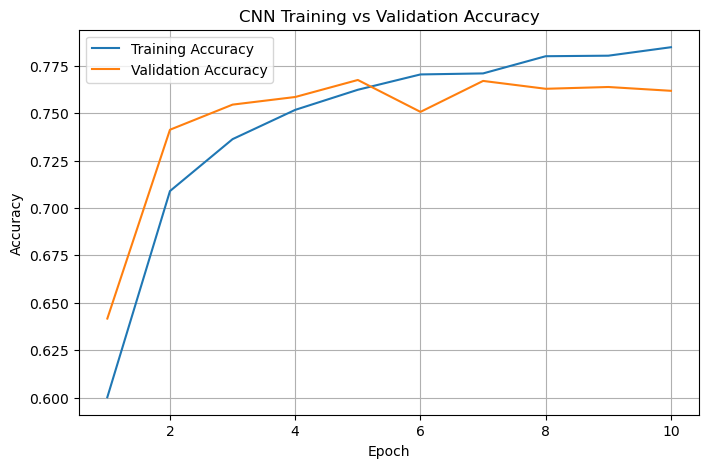

In [43]:
plot_train_and_val_score(history)

In [44]:
y_test = np.array(y_test)
print(y_test)

[2 2 2 ... 2 0 1]


In [51]:
print(X_test.shape)
print(type(X_test))
print(type(y_test))
print(y_test[:20])


(39815, 200)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[2 2 2 2 1 0 0 2 2 0 0 0 2 2 0 2 2 2 2 0]


In [ ]:
model.evaluate(X_test, y_test)

Statistical SA

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_en['combined_text'], df_en['sentiment'], test_size=0.2,  stratify=df_en["sentiment"])

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(tokenizer=str.split, preprocessor=None, lowercase=False)

In [19]:
X_train_vec = vectorizer.fit_transform(X_train) 
X_test_vec  = vectorizer.transform(X_test)


c:\Users\aleksa.cosovic\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [21]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [22]:
y_pred = model.predict(X_test_vec)

print(accuracy_score(y_test, y_pred))

0.7703629285445184


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     15923
           1       0.57      0.36      0.44      7958
           2       0.83      0.88      0.85     15934

    accuracy                           0.77     39815
   macro avg       0.72      0.70      0.70     39815
weighted avg       0.75      0.77      0.76     39815



## Lexicon based methods Vader

- predefined dictionaries with sentiment scores - no context understanding. Vadar understand emojis, slang, capitalization and punctuation

In [ ]:
!pip install vaderSentiment

In [59]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [60]:
analyzer = SentimentIntensityAnalyzer()

In [61]:
df_en_vader["scores"] = df_en_vader['combined_text'].apply(lambda x: analyzer.polarity_scores(x))

In [62]:
df_en_vader["scores"].iloc[0]


{'neg': 0.12, 'neu': 0.835, 'pos': 0.046, 'compound': -0.8743}

In [63]:
def vader_to_label(score):
    c = score['compound']
    if c > 0.40:
        return 2   
    elif c < -0.1:
        return 0   
    else:
        return 1   


In [64]:
df_en_vader["sa_vader_label"] = df_en_vader['scores'].apply(vader_to_label)

In [65]:
df_en_vader['sa_vader_label'].value_counts()

sa_vader_label
2    103774
0     55042
1     40259
Name: count, dtype: int64

In [66]:
accuracy = accuracy_score(df_en_vader['sentiment'], df_en_vader['sa_vader_label'])
print("Accuracy:", accuracy)

print(classification_report(df_en_vader['sentiment'], df_en_vader['sa_vader_label']))

Accuracy: 0.5982016827828708
              precision    recall  f1-score   support

           0       0.74      0.51      0.61     79617
           1       0.26      0.27      0.27     39787
           2       0.65      0.85      0.74     79671

    accuracy                           0.60    199075
   macro avg       0.55      0.54      0.54    199075
weighted avg       0.61      0.60      0.59    199075



## Hugging face - distilbert-base-multilingual-cased

In [ ]:
from transformers import pipeline

In [ ]:
pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis") # fine-tuned version of distilbert/distilbert-base-multilingual-cased for multilingual sentiment analysis

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

c:\Users\aleksa.cosovic\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aleksa.cosovic\.cache\huggingface\hub\models--tabularisai--multilingual-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [67]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [68]:
model_name = "tabularisai/multilingual-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

sentiment_map = {0: 0, 1: 0, 2: 1, 3: 2, 4: 2} # {0: "Very Negative", 1: "Negative", 2: "Neutral", 3: "Positive", 4: "Very Positive"}

In [69]:
def predict_sentiment(texts):
    
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)

    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    preds = torch.argmax(probabilities, dim=-1).tolist()

    return [sentiment_map[p] for p in preds]  


In [70]:
from tqdm import tqdm

In [71]:
df_en = df[df["language"] == "en"].copy()
df_de = df[df["language"] == "de"].copy()
df_es = df[df["language"] == "es"].copy()
df_fr = df[df["language"] == "fr"].copy()

In [72]:
df_en_sample = df_en.sample(frac=0.10)
df_de_sample = df_de.sample(frac=0.10)
df_es_sample = df_es.sample(frac=0.10)
df_fr_sample = df_fr.sample(frac=0.10)


In [73]:
df_en_sample.shape

(19908, 7)

In [74]:
df_all = pd.concat([df_en_sample, df_de_sample, df_es_sample, df_fr_sample],ignore_index=True)

In [75]:
df_all.sample(frac = 1)

,stars,review_body,review_title,language,product_category,combined_text,sentiment
17701,5,We bought for some summer fun and the kids abs...,Awesome!,en,toy,Awesome! We bought for some summer fun and the...,2
11565,4,The only thing I disliked about the product is...,How's it packaged?,en,office_product,How's it packaged? The only thing I disliked a...,2
41672,4,Fácil de utilizar. Tamaño adecuado,Sencillo y practico,es,kitchen,Sencillo y practico Fácil de utilizar. Tamaño ...,2
9665,3,"It works, but the little plastic screws broke....",Cheap product but effective,en,home,"Cheap product but effective It works, but the ...",1
22495,1,"Gebraucht um € 99,00 gekauft und die Ware kam ...",Enttäuschung,de,toy,"Enttäuschung Gebraucht um € 99,00 gekauft und ...",0
...,...,...,...,...,...,...,...
19616,4,We tried but this did not save our old coffee ...,Four Stars,en,kitchen,Four Stars We tried but this did not save our ...,2
7733,1,I planted it in the ground and it just dried u...,Not sure if it's a one off or not.,en,lawn_and_garden,Not sure if it's a one off or not. I planted i...,0
62315,3,Pas de commentaire particulier à faire sur l'e...,Odeur épouvantable mais fonctionne,fr,drugstore,Odeur épouvantable mais fonctionne Pas de comm...,1
60904,5,Léger pratique pour bébé,Top,fr,baby_product,Top Léger pratique pour bébé,2


In [76]:
texts = df_all["combined_text"].tolist()
batch_size = 64

In [ ]:
preds_all = []
for i in tqdm(range(0, len(texts), batch_size), total=len(texts) // batch_size + 1, desc="Processing batches"):
    batch = texts[i:i+batch_size]
    preds = predict_sentiment(batch)
    preds_all.extend(preds)

Processing batches: 100%|██████████| 491/491 [36:20<00:00,  4.44s/it]


In [ ]:
df_all["bert_scores"] = preds_all

In [ ]:
df_all

,stars,review_body,review_title,language,product_category,combined_text,sentiment,bert_scores
0,4,I was skeptical about these light bars at firs...,... wiring enters the housing and so far they ...,en,automotive,... wiring enters the housing and so far they ...,2,2
1,1,It was too small for my headphones.,Too small,en,electronics,Too small It was too small for my headphones.,0,0
2,2,I purchased the Bed Wedge Pillow to help allev...,Very uncomfortable,en,drugstore,Very uncomfortable I purchased the Bed Wedge P...,0,0
3,2,I love this product and when its stored correc...,Great product but dont buy online,en,home_improvement,Great product but dont buy online I love this ...,0,2
4,2,I ordered this item advising it was 200 pieces...,Did not receive full order.,en,other,Did not receive full order. I ordered this ite...,0,1
...,...,...,...,...,...,...,...,...
31388,1,Votre produit est d’une qualité médiocre. Aprè...,Produit MEDIOCRE !!!,fr,wireless,Produit MEDIOCRE !!! Votre produit est d’une q...,0,0
31389,5,Utile pour faire passer un ou deux câbles pour...,Utile,fr,electronics,Utile Utile pour faire passer un ou deux câble...,2,2
31390,1,Pas reçu ma livraison !!! Et aucune nouvelle o...,Colis prevu le 19 decembre,fr,home,Colis prevu le 19 decembre Pas reçu ma livrais...,0,2
31391,4,"Pieds reçus rapidement, fabrication solide mai...",Bon pieds,fr,wireless,"Bon pieds Pieds reçus rapidement, fabrication ...",2,0


In [ ]:
print(classification_report(df_all['sentiment'], df_all['bert_scores']))

              precision    recall  f1-score   support

           0       0.62      0.85      0.72     12680
           1       0.22      0.09      0.13      6243
           2       0.82      0.75      0.78     12470

    accuracy                           0.66     31393
   macro avg       0.56      0.57      0.54     31393
weighted avg       0.62      0.66      0.63     31393



## Fine tuning distilbert

In [77]:
model='distilbert-base-multilingual-cased'
classifier = AutoModelForSequenceClassification.from_pretrained(model, num_labels=3) 
tokenizer = AutoTokenizer.from_pretrained(model) # Get the tokenizer

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [78]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62786 entries, 0 to 62785
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stars             62786 non-null  int64 
 1   review_body       62786 non-null  object
 2   review_title      62781 non-null  object
 3   language          62786 non-null  object
 4   product_category  62786 non-null  object
 5   combined_text     62786 non-null  object
 6   sentiment         62786 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


In [79]:
df_all = df_all.loc[:, ['combined_text','sentiment']]

In [80]:
from sklearn.model_selection import train_test_split

df_train_all, df_test_all = train_test_split(df_all, train_size=0.8, stratify = df_all['sentiment'])

In [81]:
df_train_all.shape

(50228, 2)

In [ ]:
!pip install datasets


   ----------------------------------------  0/11 [xxhash]
   --- ------------------------------------  1/11 [propcache]
   --- ------------------------------------  1/11 [propcache]
   ------- --------------------------------  2/11 [multidict]
   ---------- -----------------------------  3/11 [frozenlist]
   -------------- -------------------------  4/11 [dill]
   -------------- -------------------------  4/11 [dill]
   -------------- -------------------------  4/11 [dill]
   ------------------ ---------------------  5/11 [aiohappyeyeballs]
   --------------------- ------------------  6/11 [yarl]
   ------------------------- --------------  7/11 [multiprocess]
   ------------------------- --------------  7/11 [multiprocess]
   ------------------------- --------------  7/11 [multiprocess]
   -------------------------------- -------  9/11 [aiohttp]
   -------------------------------- -------  9/11 [aiohttp]
   -------------------------------- -------  9/11 [aiohttp]
   ----------------

In [82]:
from datasets import Dataset, DatasetDict

In [83]:
raw_datasets = DatasetDict({
    "train": Dataset.from_pandas(df_train_all),
    "eval": Dataset.from_pandas(df_test_all)
})

In [84]:
print(raw_datasets)

DatasetDict({
    train: Dataset({
        features: ['combined_text', 'sentiment', '__index_level_0__'],
        num_rows: 50228
    })
    eval: Dataset({
        features: ['combined_text', 'sentiment', '__index_level_0__'],
        num_rows: 12558
    })
})


In [85]:
# Tokenize, truncate. Batched= True to tokenize multiple texts at the same time.
tokenized_datasets = raw_datasets.map(lambda dataset: tokenizer(dataset['combined_text'], truncation=True, max_length=64), batched=True)
print(tokenized_datasets)

Map:   0%|          | 0/50228 [00:00<?, ? examples/s]

Map:   0%|          | 0/12558 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['combined_text', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 50228
    })
    eval: Dataset({
        features: ['combined_text', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 12558
    })
})


In [86]:
# Check the first row
print(tokenized_datasets["train"][0])

{'combined_text': 'Insatisfecho Lo compré para descargar algunas aplicaciones básicas como Netflix, Hbo, Vodafone... y no funcionan!! Decepcionado.', 'sentiment': 0, '__index_level_0__': 39733, 'input_ids': [101, 10167, 20095, 10291, 14601, 16575, 13069, 10212, 52302, 10333, 10220, 10139, 69115, 10129, 20579, 77894, 95058, 10107, 10225, 59730, 117, 145, 11790, 117, 100036, 78467, 119, 119, 119, 193, 10192, 69557, 10115, 106, 106, 46147, 19986, 57416, 119, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [87]:
# HuggingFace Trainer requires this
tokenized_datasets = tokenized_datasets.remove_columns(["combined_text", "__index_level_0__"])
tokenized_datasets = tokenized_datasets.rename_column("sentiment", "labels")
print(tokenized_datasets)

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 50228
    })
    eval: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 12558
    })
})


In [ ]:
!pip -q install evaluate

In [ ]:
!pip install --upgrade transformers


In [ ]:
!pip install "transformers[torch]"


In [88]:
from transformers import DataCollatorWithPadding, TrainingArguments, Trainer
import numpy as np
import evaluate

# Padding for batch of data that will be fed into model for training
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


training_args = TrainingArguments(
    output_dir="test-trainer",
    num_train_epochs=1,
    per_device_train_batch_size=16,       # faster
    per_device_eval_batch_size=16,
    weight_decay=5e-4,
    save_strategy="no",
    report_to="none",
    logging_steps=100,
    optim="adafactor"                     # faster optimizer
)


# Metric for validation error
def compute_metrics(eval_preds):
    metric = evaluate.load("accuracy")  
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Define trainer
trainer = Trainer(
    classifier,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["eval"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

C:\Users\aleksa.cosovic\AppData\Local\Temp\ipykernel_10744\4146954917.py:30: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [89]:
# Start the fine-tuning 
trainer.train()

c:\Users\aleksa.cosovic\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,0.960200
200,0.788000
300,0.755600
400,0.721900
500,0.714300
600,0.697400
700,0.654100
800,0.646000
900,0.648200
1000,0.665500


TrainOutput(global_step=3140, training_loss=0.6374546227181793, metrics={'train_runtime': 6841.2044, 'train_samples_per_second': 7.342, 'train_steps_per_second': 0.459, 'total_flos': 831591343868256.0, 'train_loss': 0.6374546227181793, 'epoch': 1.0})

In [90]:
# Make prediction on evaluation dataset
y_pred = trainer.predict(tokenized_datasets["eval"]).predictions
y_pred = np.argmax(y_pred, axis=-1)

# Get the true labels
y_true = tokenized_datasets["eval"]["labels"]
y_true = np.array(y_true)



In [91]:
# Print the classification report
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.760     0.888     0.819      5021
           1      0.538     0.326     0.406      2522
           2      0.842     0.867     0.854      5015

    accuracy                          0.767     12558
   macro avg      0.713     0.694     0.693     12558
weighted avg      0.748     0.767     0.750     12558



In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     15923
           1       0.57      0.36      0.44      7958
           2       0.83      0.88      0.85     15934

    accuracy                           0.77     39815
   macro avg       0.72      0.70      0.70     39815
weighted avg       0.75      0.77      0.76     39815



In [92]:
# Print the classification report
# print(classification_report(y_true, y_pred, digits=3))

In [93]:
model_save_path = r"E:\aleksa_praksa\nlp_internship\data-internship\src\saved_models\models\sentiment_anal"
tokenizer_save_path = r"E:\aleksa_praksa\nlp_internship\data-internship\src\saved_models\vectorizer\tokenizer_sentiment"

# save model (weights + config)
trainer.model.save_pretrained(model_save_path)

# save tokenizer (vocab + config)
tokenizer.save_pretrained(tokenizer_save_path)

print("Model and tokenizer saved successfully!")


Model and tokenizer saved successfully!
